In [1]:
%pylab inline
import pandas as pd
import numpy as np
from altair import *
import datetime
import analyzeWiggles as aw

Populating the interactive namespace from numpy and matplotlib


# Loading data from I15 Southbound

In [2]:
i15S = pd.read_csv('../../I15S_data2.csv')

# Adding columns to dataframe for Weekday and Weekday/Weekend
### Function from analyzeWiggles

In [3]:
i15S['WeekdayWeekend'] = i15S['Timestamp'].apply(lambda x: aw.strTimestampToWeekDayEnd(x))
i15S['WeekdayNumber']=i15S['Timestamp'].apply(lambda x: aw.strTimestampToWeekdayNum(x))

# Wiggles - Occupancy, Flow and Speed
### Mean across all stations - All Days

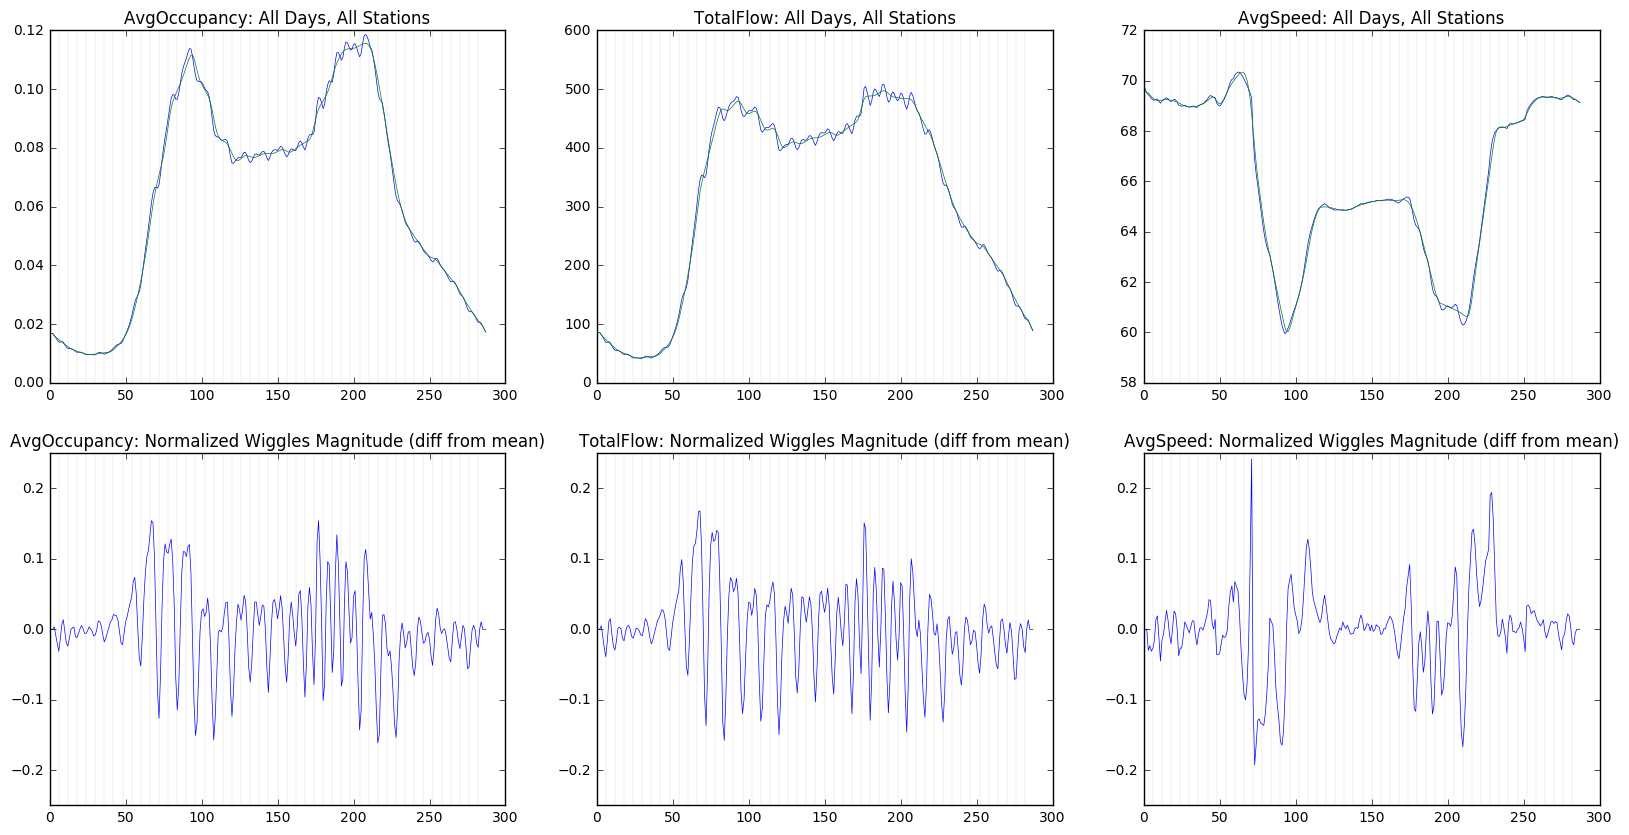

In [6]:
def wigglesOFS(_df, title):
    fig = plt.figure(figsize = (20,10))
    metrics = ['AvgOccupancy', 'TotalFlow', 'AvgSpeed']

    for i,m in enumerate(metrics):
        mv = np.array(_df[['Time',m]].groupby(['Time']).mean()[m])
        vectors = aw.smooth_vector(mv, 'akima', 6)

        ax = fig.add_subplot(2, 3, i+1)
        plt.plot(vectors['meanVector'], linewidth=.5)
        plt.plot(vectors['timelabels'], vectors['smoothedVector'], linewidth=.5)
        for j in range(0,288,12):
            plt.axvline(x=j, linewidth=.1, color='gray')
            plt.axvline(x=j+6, linewidth=.1, color='gray')
        plt.title(str(m)+": "+str(title))

        ax = fig.add_subplot(2, 3, i+4)
        plt.plot(vectors['timelabels'],vectors['diffVector'], color="blue", linewidth=.5)
        plt.title(m +": Normalized Wiggles Magnitude (diff from mean)")
        plt.ylim((-.25,.25))
        for i in range(0,288,12):
            plt.axvline(x=i, linewidth=.1, color='gray')
            plt.axvline(x=i+6, linewidth=.1, color='gray')

    plt.show()
    
wigglesOFS(i15S, "All Days, All Stations")

### Weekdays, All Stations

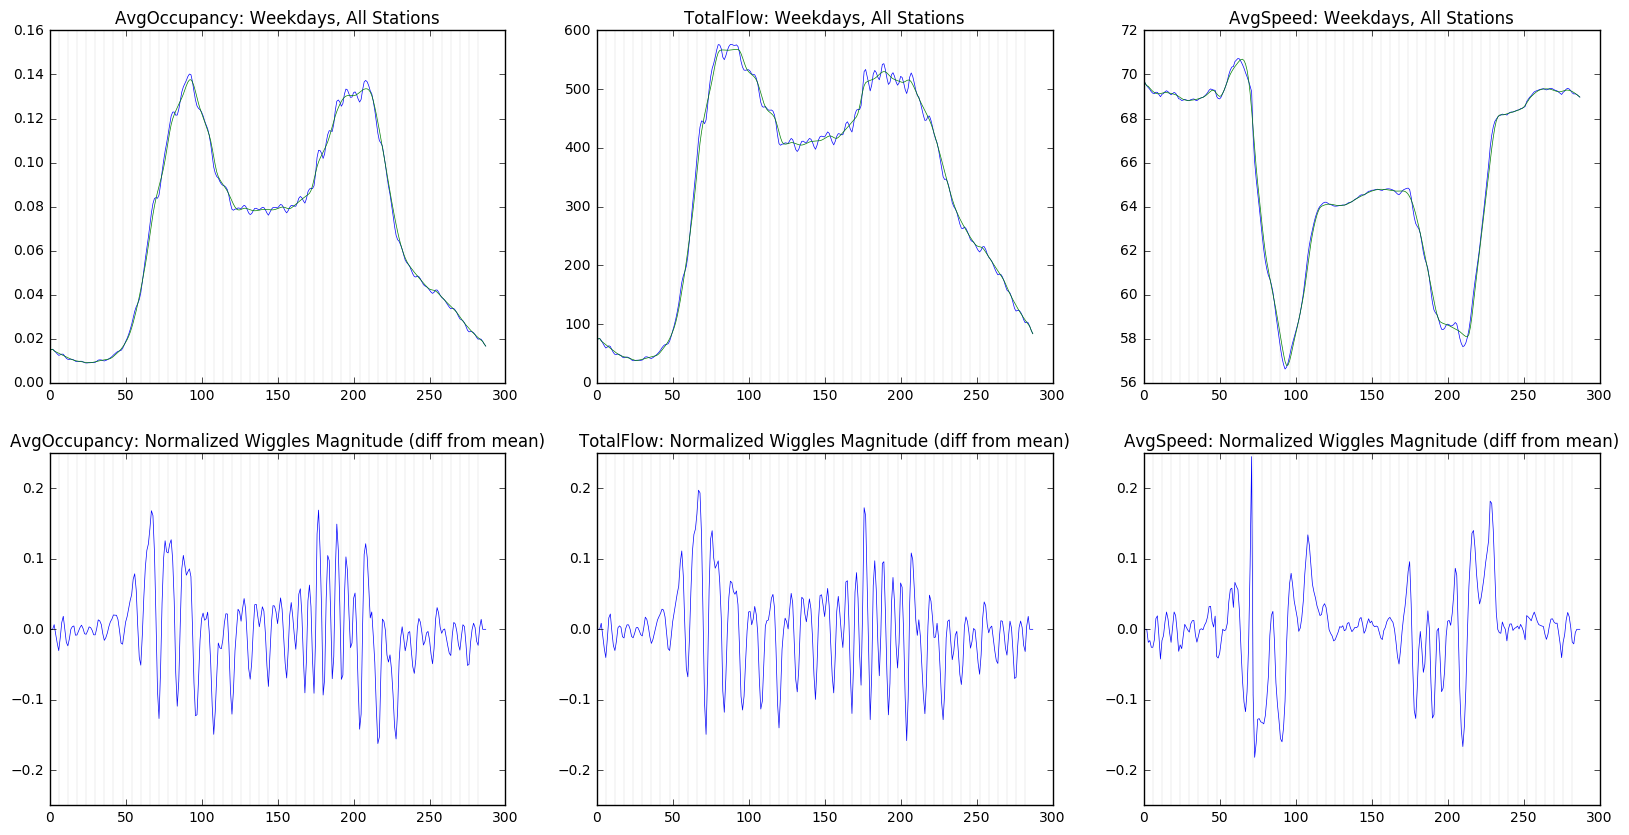

In [8]:
wigglesOFS(i15S[i15S['WeekdayWeekend'] == 'Weekday'], "Weekdays, All Stations")

### Weekends, All Stations

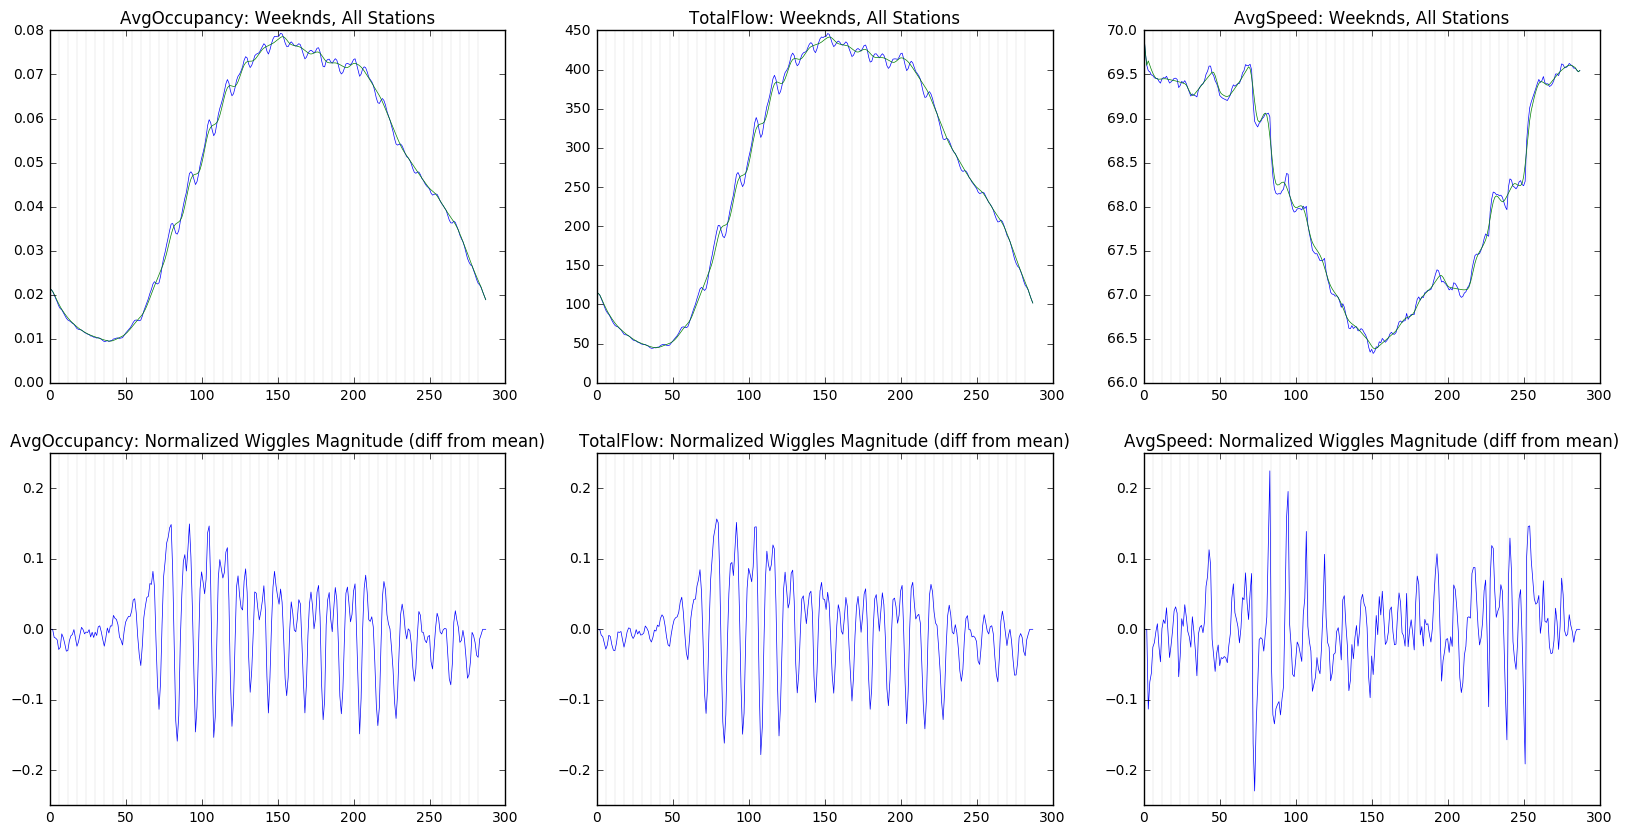

In [7]:
wigglesOFS(i15S[i15S['WeekdayWeekend'] == 'Weekend'], "Weeknds, All Stations")

#  By Station
### Individual Stations

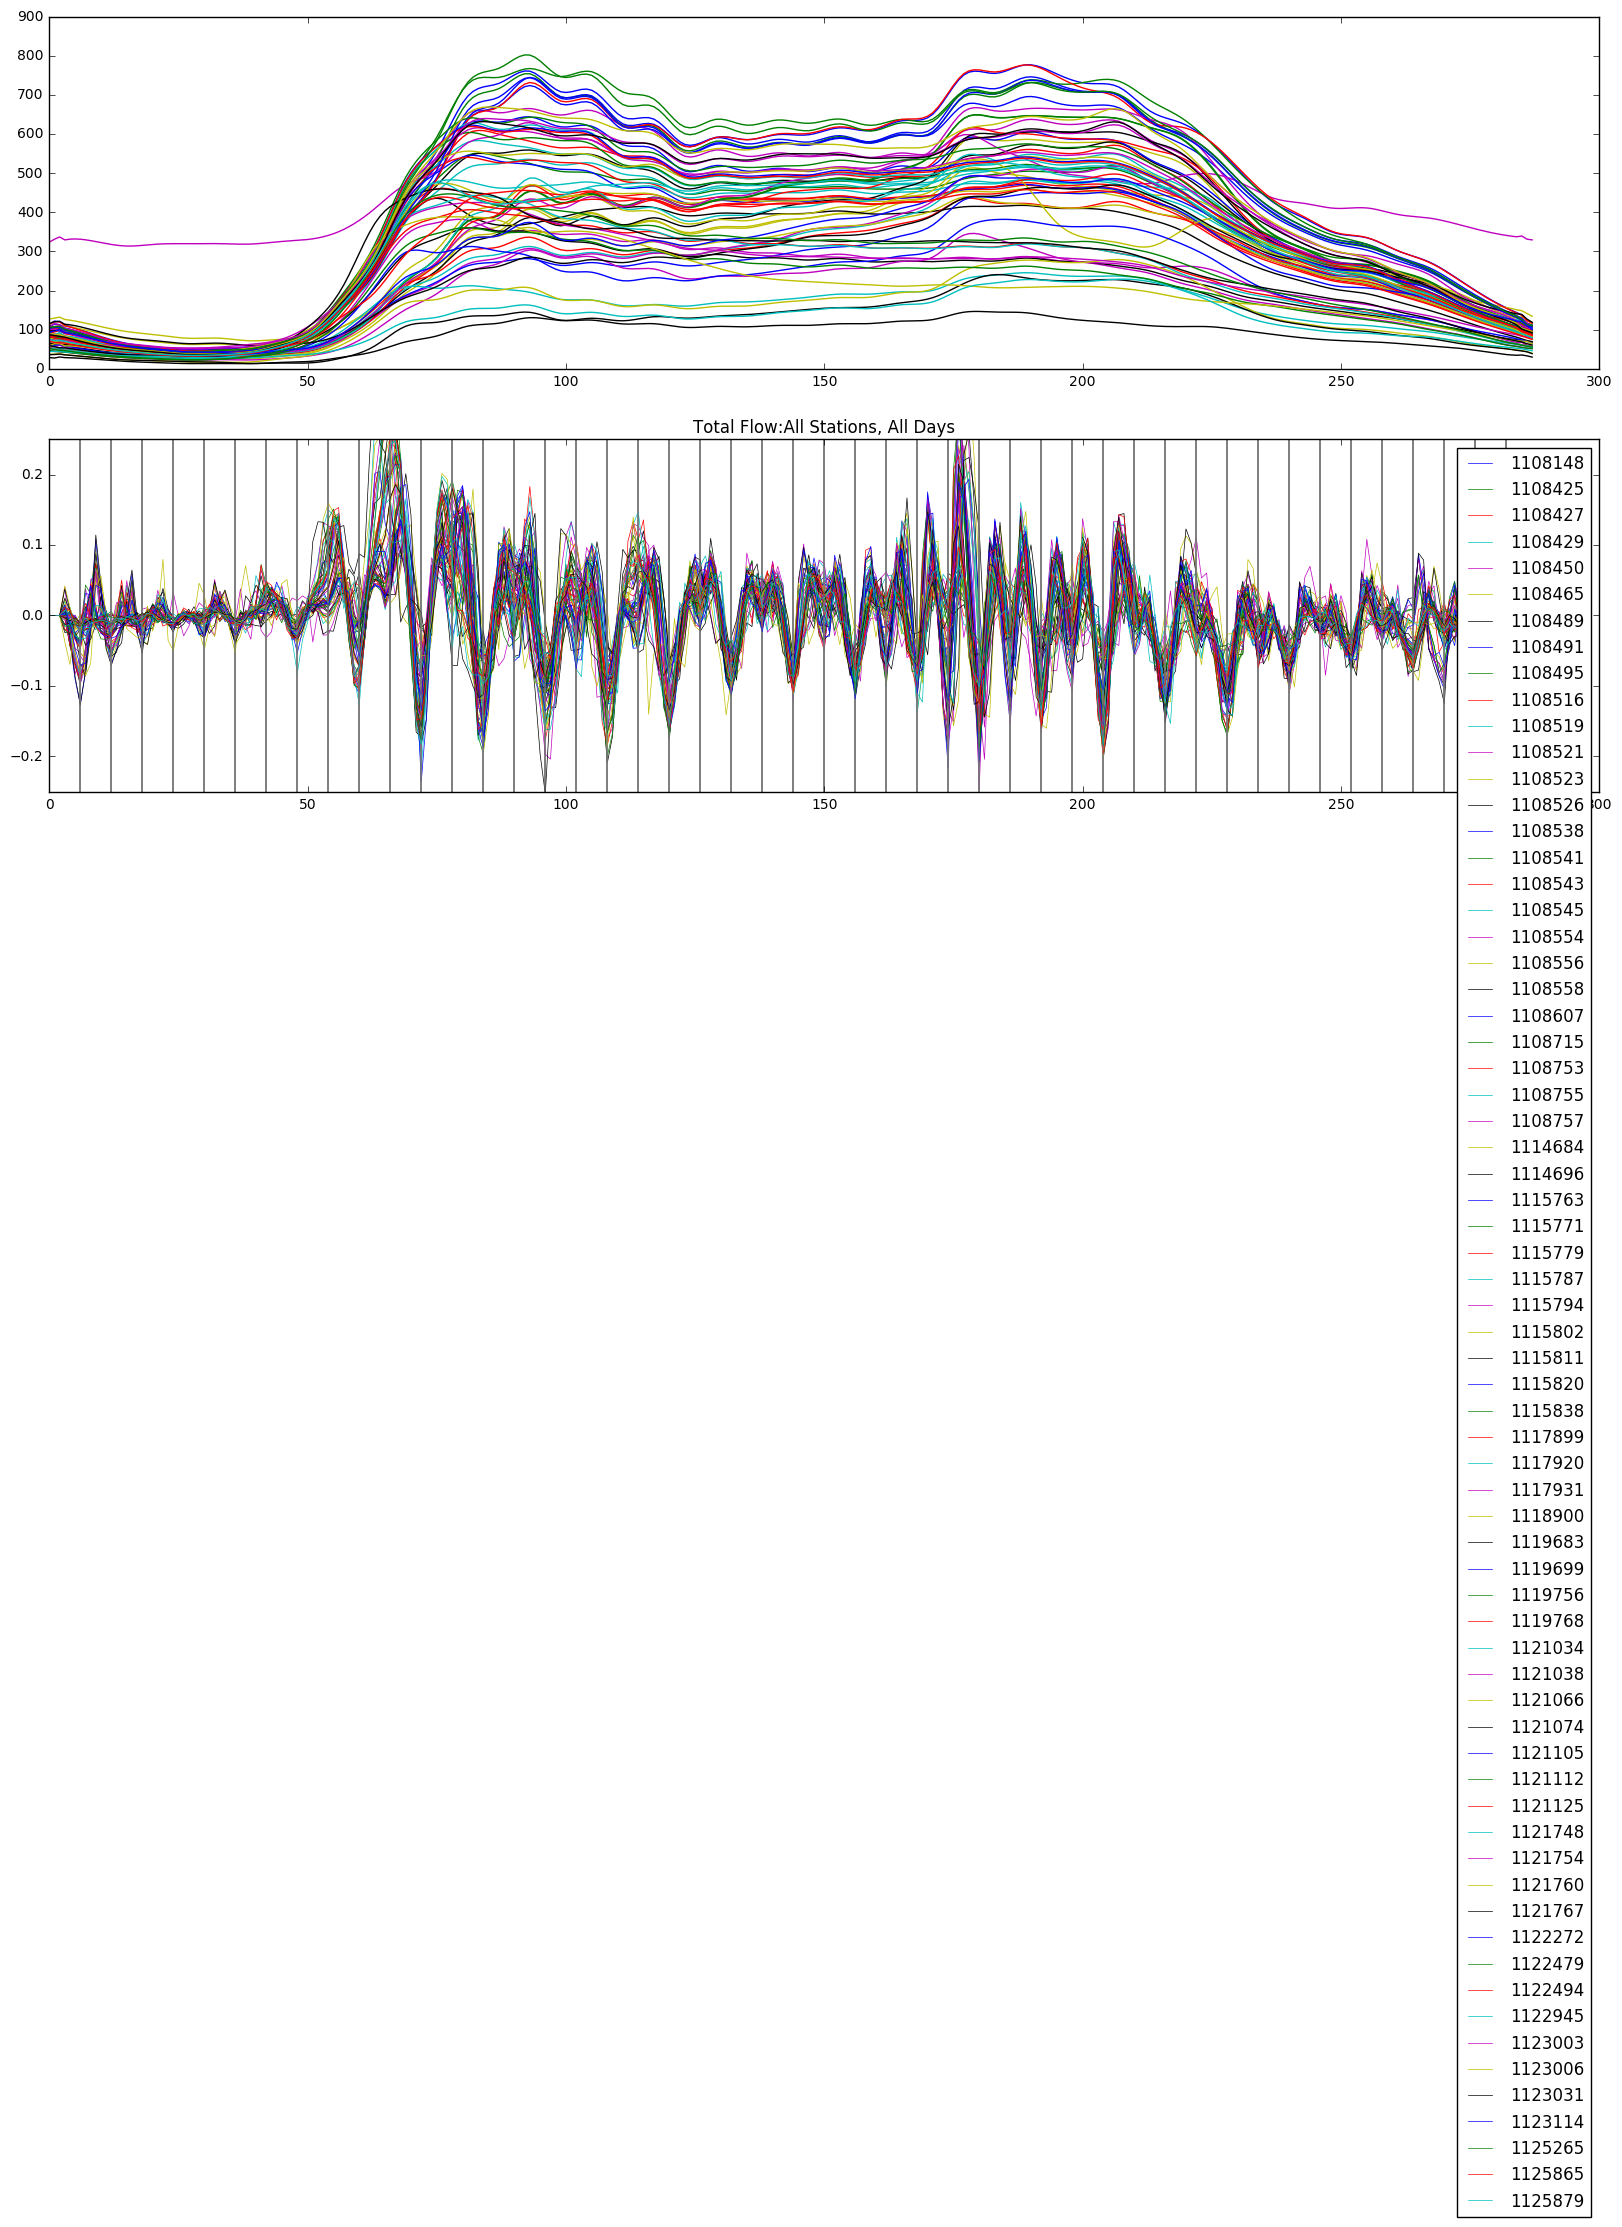

In [20]:
def plotSmoothedMeansByStation(_df, factor=8, title='', output_file=False):
    fig = plt.figure(figsize = (20,10))

    station_latlong = _df[['Station','Latitude', 'Longitude']]
    lat_max =  station_latlong['Latitude'].max()
    lon_max =  station_latlong['Longitude'].max()
    lat_min =  station_latlong['Latitude'].min()
    lon_min =  station_latlong['Longitude'].min()

    df = {}

    for s in  list(_df['Station'].unique()):
        data = _df[_df['Station'] == s]
        mv = np.array(data[['Time','TotalFlow']].groupby(['Time']).mean()['TotalFlow'])
        vectors = aw.smooth_vector(mv, 'cubic', factor)
        df_temp = pd.DataFrame.from_records(vectors)
        df_temp['station'] = s
        try:
            lat = station_latlong[station_latlong.index == s]['Latitude'].values[0]
            lon = station_latlong[station_latlong.index == s]['Longitude'].values[0]
        except:
            lat = station_latlong[station_latlong.index == s]['Latitude']
            lon = station_latlong[station_latlong.index == s]['Longitude']
        lat_norm = (lat_max-lat)/(lat_max-lat_min)
        lon_norm = (lon_max-lon)/(lon_max-lon_min)
        df_temp['lat_norm'] = lat_norm
        df_temp['lon_norm'] = lon_norm
        df_temp['lat'] = lat
        df_temp['lon'] = lon
        #print lat, lon
        try:
            df = pd.concat([df_temp, df], axis=0)
        except:
            df = df_temp
        ax = fig.add_subplot(2, 1, 1)
        plt.plot(df_temp['timelabels'], df_temp['smoothedVector'], label=s)
        
        ax = fig.add_subplot(2, 1, 2)
        plt.plot(df_temp['timelabels'],df_temp['diffVector'], label=s, linewidth=.5)
        plt.title("Normalized Wiggles Magnitude (diff from mean)")
        plt.ylim((-.25,.25))
        for i in range(0,288,12):
            plt.axvline(x=i, linewidth=.1, color='gray')
            plt.axvline(x=i+6, linewidth=.1, color='gray')

    #df
    plt.title('Total Flow:' + str(title))
    plt.legend()
    plt.show()

    if output_file:
        df.to_csv(output_file)
    return df

df_all_stations = plotSmoothedMeansByStation(i15S, 6, 'All Stations, All Days', 'wiggles.csv')

In [21]:
#Rank1 Stations:
rank1 = [1108313, 1108315, 1108317, 1108328, 1108331, 1108339, 1108341, 1108343, 1108351, 1108353, 1108360, 
         1108372, 1108389, 1108401, 1108413, 1108419, 1108421, 1108423, 1108427, 1108429, 1108465, 1108473, 
         1108486, 1108512, 1108523, 1108531, 1108543, 1108547, 1108560, 1108562, 1108564, 1108572, 1108582, 
         1108592, 1108597, 1108623, 1108625, 1108627, 1108649, 1108661, 1108687, 1108693, 1108700, 1108717, 
         1108728, 1108739, 1108741, 1108743, 1108745, 1108760, 1111514, 1111526, 1111531, 1111535, 1111557, 
         1111569, 1111570, 1111575, 1112989, 1113126, 1113138, 1113147, 1113292, 1113318, 1113364, 1113720, 
         1113740, 1115240, 1115450, 1115486, 1115537, 1115612, 1115616, 1115624, 1115649, 1115656, 1115663, 
         1115721, 1115739, 1115771, 1115779, 1115787, 1115811, 1115820, 1115838, 1115897, 1115921, 1115929, 
         1115937, 1115946, 1116092, 1116098, 1116119, 1116133, 1116139, 1116145, 1116158, 1116318, 1117836, 
         1117850, 1117899, 1118013, 1118170, 1118260, 1118521, 1118529, 1118707, 1118796, 1118957, 1119528, 
         1119645, 1119653, 1119679, 1119683, 1119689, 1119694, 1119699, 1119749, 1119762, 1119842, 1119850, 
         1119865, 1119871, 1119890, 1119897, 1119934, 1119947, 1119954, 1119960, 1119966, 1119972, 1119978, 
         1119984, 1119990, 1119997, 1120356, 1120362, 1121037, 1121038, 1121105, 1121112, 1121118, 1122394, 
         1122469, 1122479, 1122507, 1122552, 1122560, 1122575, 1122594, 1122645, 1122646, 1123030, 1123031, 
         1123078, 1123081, 1125314, 1125348, 1125353, 1125689, 1125836, 1125865, 1125872, 1125879]

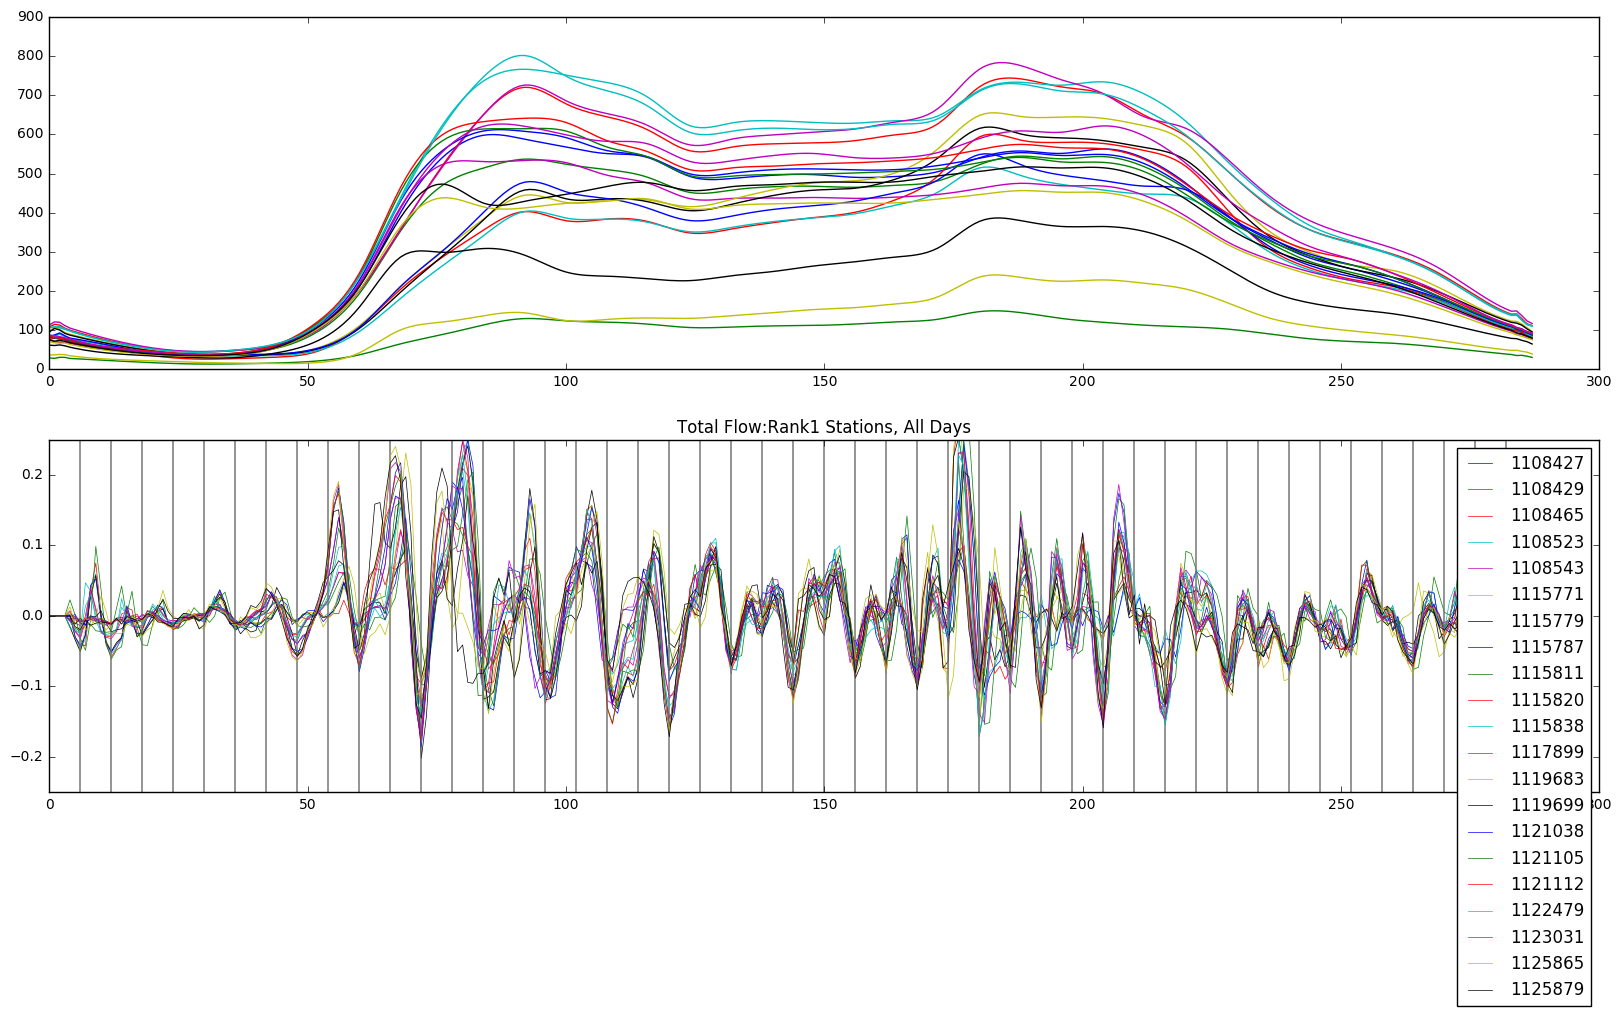

In [22]:
df_rank1_alldays = plotSmoothedMeansByStation(i15S[i15S['Station'].isin(rank1)], 8, 'Rank1 Stations, All Days')

In [ ]:
df_rank1_alldays

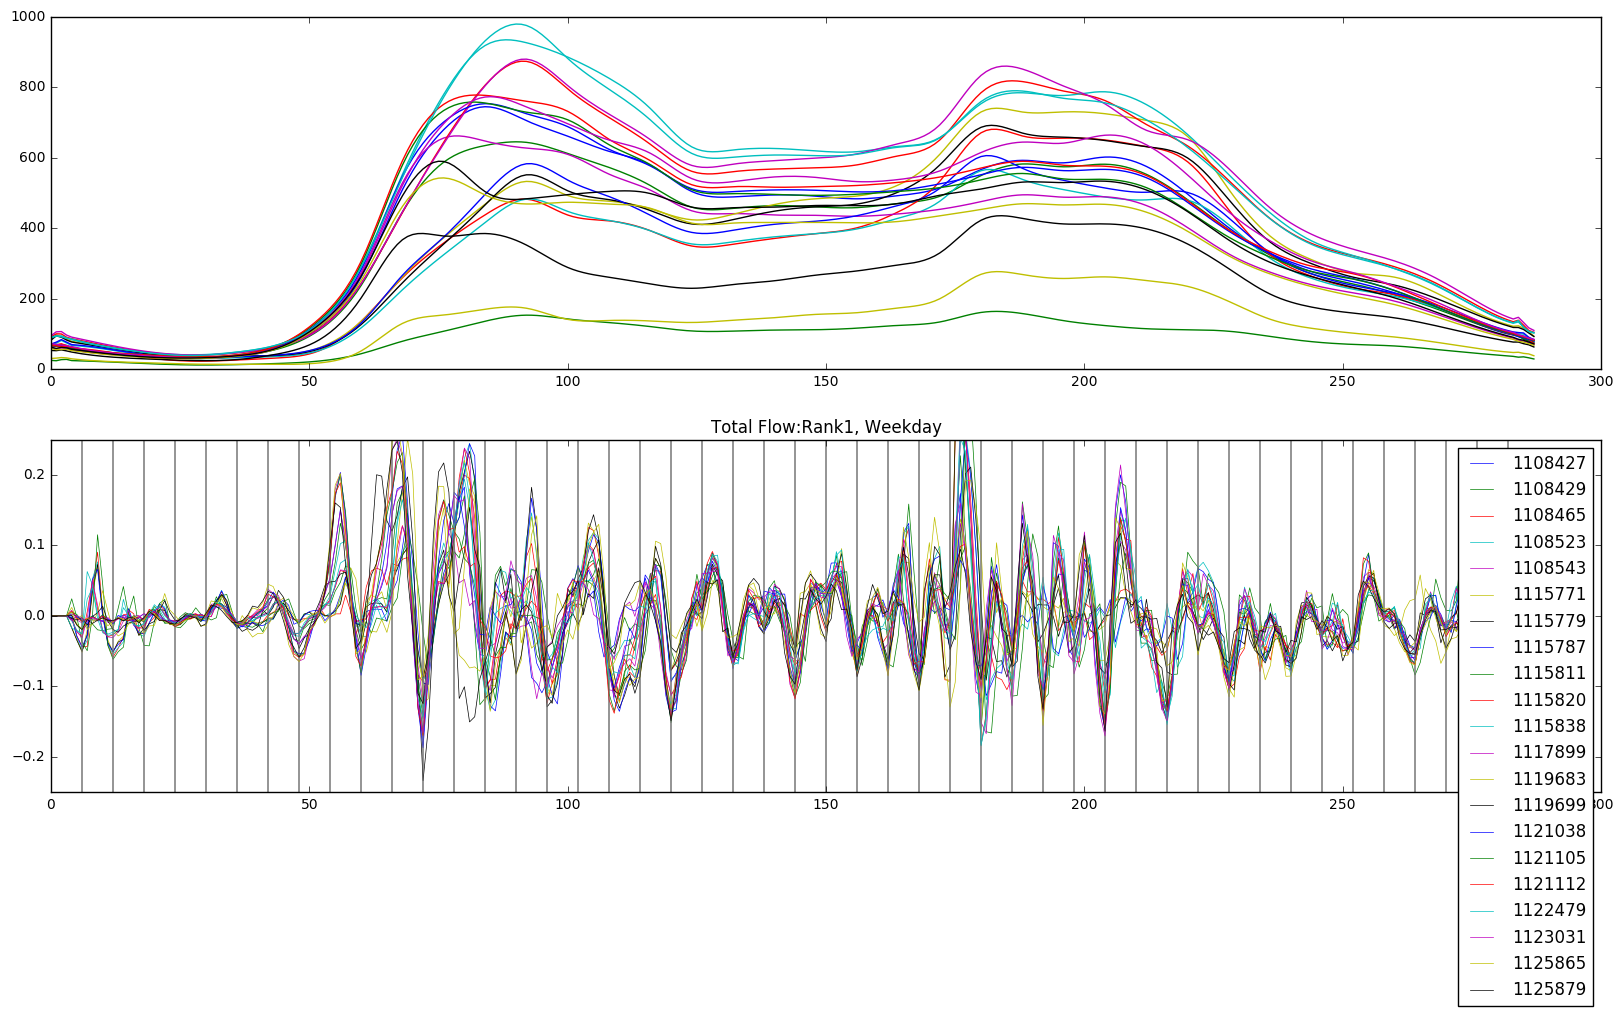

In [23]:
df_weekday_rank1 = i15S[i15S['Station'].isin(rank1)]
df_weekday_rank1 = df_weekday_rank1[df_weekday_rank1['WeekdayWeekend'] == 'Weekday']
df_weekday_rank1 = plotSmoothedMeansByStation(df_weekday_rank1[df_weekday_rank1['Station'].isin(rank1)], 8, 'Rank1, Weekday')


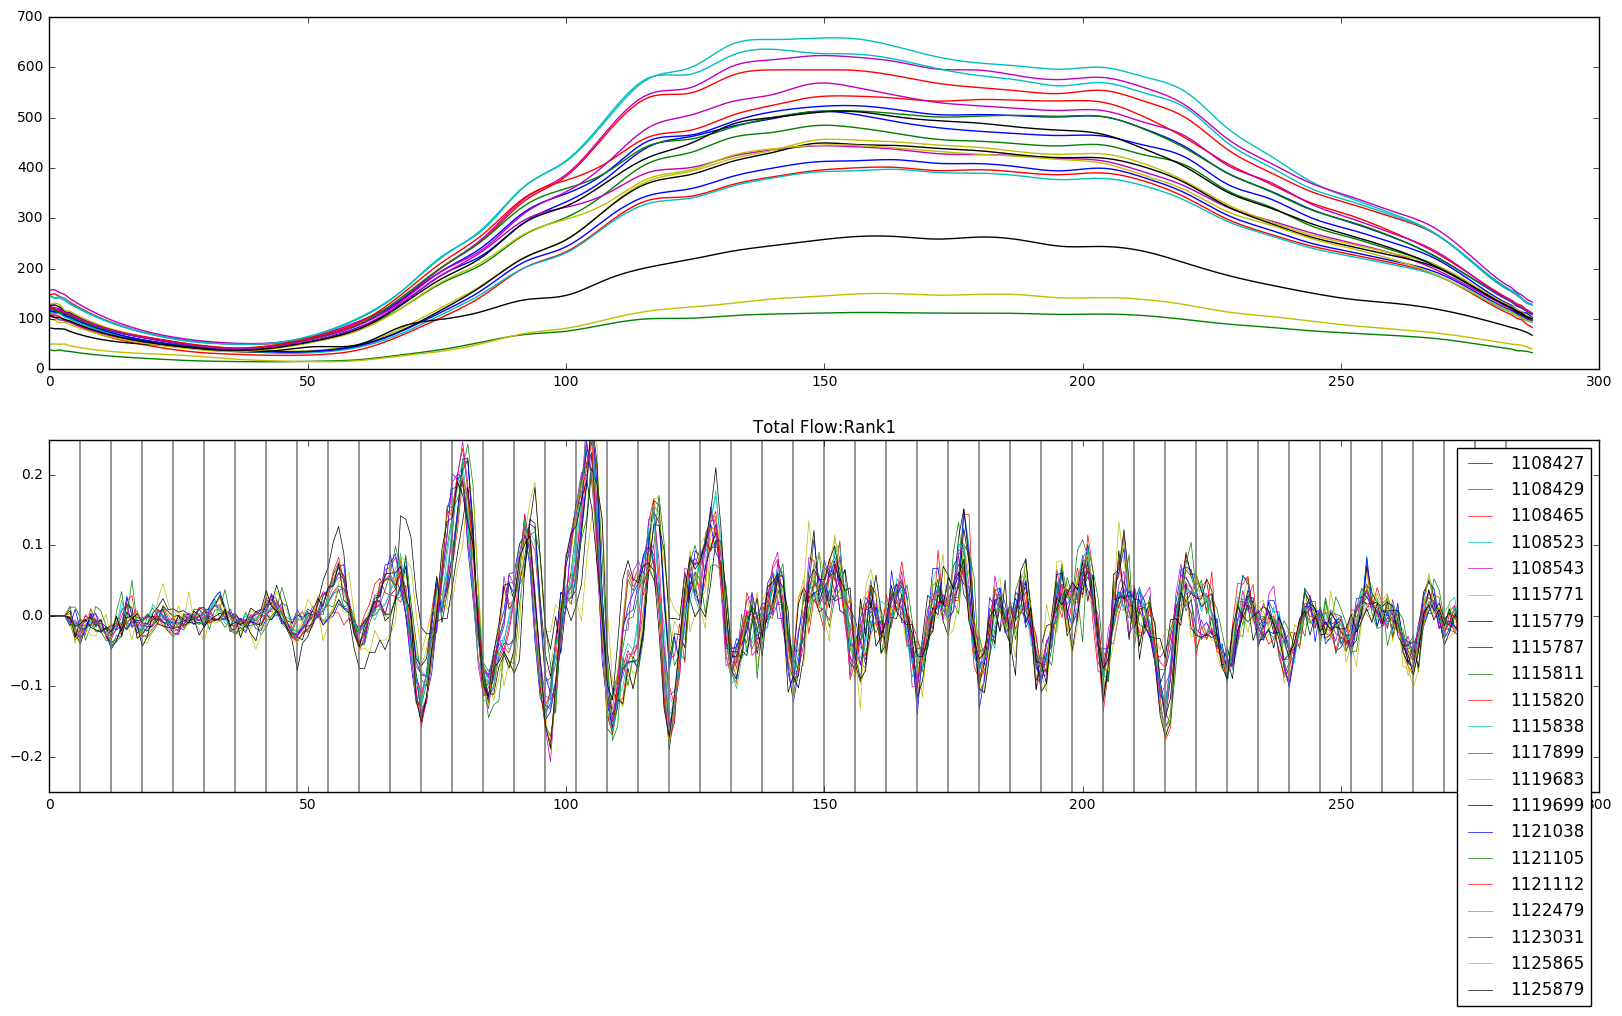

In [24]:
df_weekend_rank1 = i15S[i15S['Station'].isin(rank1)]
df_weekend_rank1 = df_weekend_rank1[df_weekend_rank1['WeekdayWeekend'] == 'Weekend']
df_weekend_rank1 = plotSmoothedMeansByStation(df_weekend_rank1[df_weekend_rank1['Station'].isin(rank1)], 8, 'Rank1')


In [ ]:
### Using Rank1 stations - Station By Station Analysis
https://github.com/mas-dse-c6sander/DSE_Cohort2_Traffic_Capstone/wiki/List-of-Stations-in-rank-order-for-2015

# <a href="https://public.tableau.com/shared/SS7X3DBZH?:display_count=yes">Click here for Interactive Wiggles</a>
